# Chapter 32

# Introduction to PyTorch

## Installing PyTorch and tools

[https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

### Windows

`pip3 install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html`

### MacOS   

**MacOS Binaries dont support CUDA, install from source if CUDA is needed**   
`pip3 install torch torchvision torchaudio`

## Verifying PyTorch

In [1]:
import torch

torch.__version__

'1.10.0+cu102'

In [2]:
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.0093, 0.9668, 0.4465],
        [0.2935, 0.1561, 0.6897],
        [0.4198, 0.9665, 0.7184],
        [0.7998, 0.5311, 0.8852],
        [0.3261, 0.9041, 0.6001]])


In [4]:
import torchvision

torchvision.__version__

'0.11.1+cu102'

## Check for GPU and CUDA Enabled

In [3]:
import torch
torch.cuda.is_available()

False

In [7]:
import torch
torch.cuda.current_device()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Install Other Tools or packages

In [6]:
!pip install -q matplotlib
!pip install -q pandas


In [12]:
import matplotlib.pyplot 

matplotlib._get_version()

'3.5.0'

In [11]:
import pandas 
pandas.__version__

'1.3.4'

## QuickStart From PyTorch Website

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt


In [14]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.6%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



119.3%


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [35]:
len(training_data), len(test_data)

(60000, 10000)

In [50]:
classes = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [51]:
X, y = training_data[0]
print(X.shape)
print(X.squeeze().shape)
print(y)


torch.Size([1, 28, 28])
torch.Size([28, 28])
9


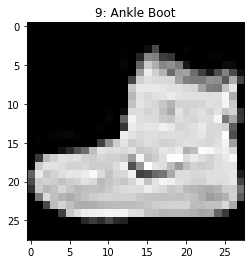

In [52]:
import matplotlib.pyplot as plt

img = X.squeeze()
plt.imshow(img, cmap="gray")
plt.title(f"{y}: {classes[y]}")
plt.show()

torch.Size([1, 28, 28])
torch.Size([28, 28])
3


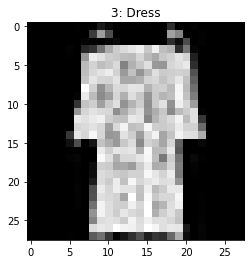

In [53]:
import matplotlib.pyplot as plt


X, y = test_data[33]
print(X.shape)
print(X.squeeze().shape)
print(y)

img = X.squeeze()
plt.imshow(img, cmap="gray")
plt.title(f"{y}: {classes[y]}")
plt.show()

### Dataloader

In [42]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


### Create Model

In [39]:
import torch

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Model Parameter

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [41]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [43]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Train

In [44]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.293944  [    0/60000]
loss: 2.283107  [ 6400/60000]
loss: 2.263051  [12800/60000]
loss: 2.264155  [19200/60000]
loss: 2.235279  [25600/60000]
loss: 2.216281  [32000/60000]
loss: 2.221374  [38400/60000]
loss: 2.191495  [44800/60000]
loss: 2.172330  [51200/60000]
loss: 2.155229  [57600/60000]
Test Error: 
 Accuracy: 51.8%, Avg loss: 2.144590 

Epoch 2
-------------------------------
loss: 2.151530  [    0/60000]
loss: 2.140800  [ 6400/60000]
loss: 2.085620  [12800/60000]
loss: 2.107805  [19200/60000]
loss: 2.041889  [25600/60000]
loss: 1.991527  [32000/60000]
loss: 2.016886  [38400/60000]
loss: 1.942764  [44800/60000]
loss: 1.933335  [51200/60000]
loss: 1.877687  [57600/60000]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.868540 

Epoch 3
-------------------------------
loss: 1.900232  [    0/60000]
loss: 1.869593  [ 6400/60000]
loss: 1.756367  [12800/60000]
loss: 1.800781  [19200/60000]
loss: 1.677737  [25600/60000]
loss: 1.642222  [32000/600

### Save Model

In [48]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Load Model

In [55]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [67]:
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0).item()], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle Boot", Actual: "Ankle Boot"
